In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [111]:
dataset=pd.read_excel("Superstore_USA.xlsx")
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,East,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530


In [30]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [64]:
#fill the missing values in product base margin
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [31]:
dataset.shape

(9426, 24)

In [37]:
dataset['Order Priority']=dataset['Order Priority'].replace('Critical ','Critical')

In [67]:
dataset["order year"]=dataset['Order Date'].dt.year

In [39]:
dataset['Order Priority'].unique()

ORDER PRIORITY 

In [38]:
#analysis ordes bassed on order priority 
dataset['Order Priority'].value_counts()   

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

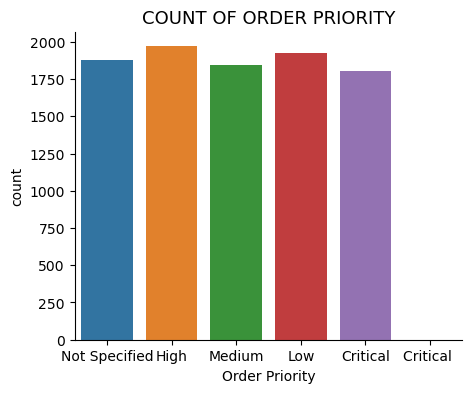

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("COUNT OF ORDER PRIORITY",fontsize=13)
plt.savefig("COUNT OF ORDER PRIORITY.jpg")
sns.despine()
plt.show()

SHIP MODE

In [5]:
#analysis ship mode
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [10]:
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values

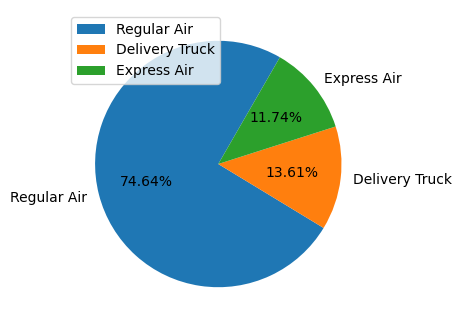

In [20]:
plt.figure(figsize=(4,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

sns.countplot(x="Ship Mode" ,data=dataset,hue="Product Category")
plt.show()

CUSTEMOR SEGMENT 

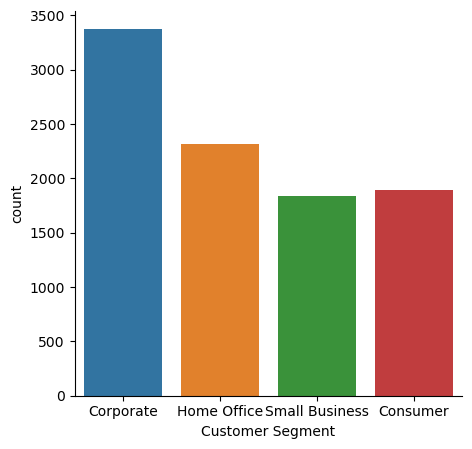

In [116]:
# analysis bassed on custemor 
plt.figure(figsize=(5,5))
sns.countplot(x="Customer Segment",data=dataset)
sns.despine()
plt.show()

PRODUCT CATEGORY 

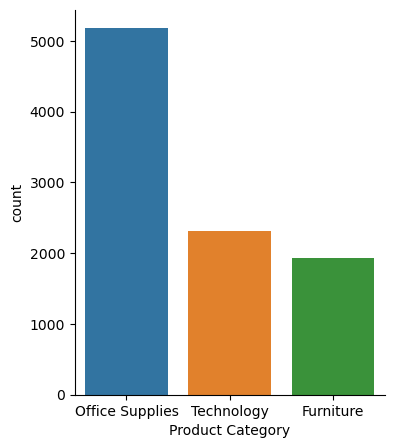

In [113]:
#analysis bassed on product category
plt.figure(figsize=(4,5))
sns.countplot(x="Product Category",data=dataset)
sns.despine()
plt.show()


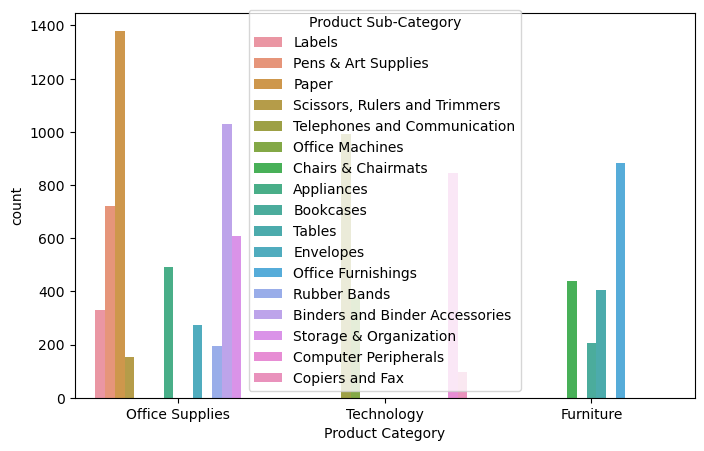

In [62]:
# analysis product category bassed on sub category
plt.figure(figsize=(8,5))
sns.countplot(x="Product Category",data=dataset,hue="Product Sub-Category")
plt.show()



ORDER DATE 

In [69]:
# analysis count order bassed on year 
dataset["order year"].value_counts()

order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

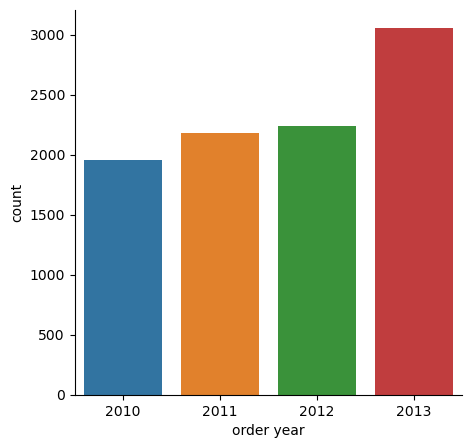

In [72]:
plt.figure(figsize=(5,5))
sns.countplot(x="order year",data=dataset)
sns.despine()
plt.show()

PROFIT 

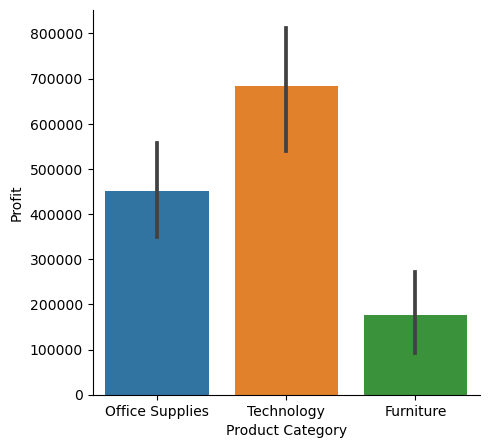

In [115]:
#analysis product category bassed on profit 
plt.figure(figsize=(5,5))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
sns.despine()
plt.show()


states

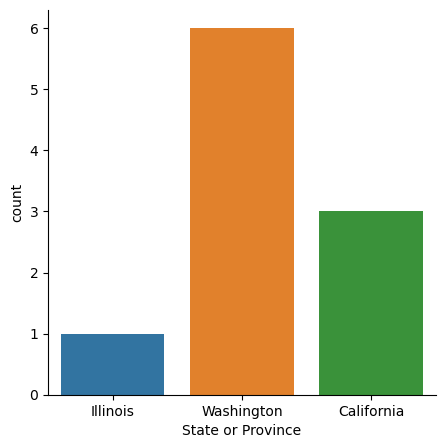

In [104]:
#analysis sales bassed on state or province
plt.figure(figsize=(5,5))
sns.countplot(x="State or Province",data=dataset)
sns.despine()
plt.show()

PRODUCT BASE MARGIN

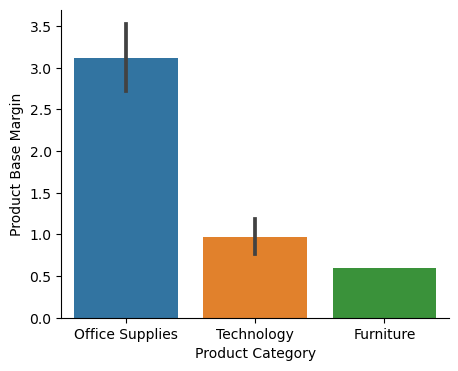

In [108]:
#analysis product category bassed on product base margin
plt.figure(figsize=(5,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator='sum')
sns.despine()
plt.show()